In [1]:
import sys
sys.path.append("../")
from analysis import System as syst
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = syst("sagnac", ["../../data/20240708/cage-pos" + str(x + 1) + "/iter_0.tdms" for x in range(12)], snr_resolution = 25, snr_freq_range = [1e4, 1e7], channel = "Y")

In [3]:
for x in range(12):
    s.set_data(ind = x)

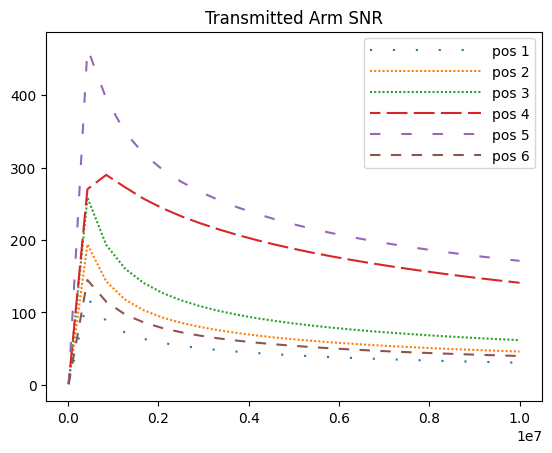

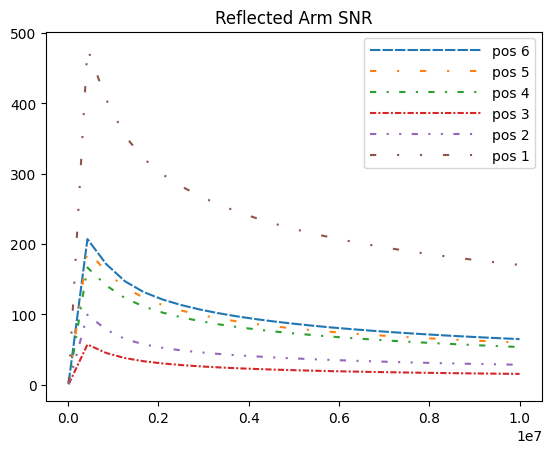

In [4]:
ind = 6
c = 1

linestyle_tuple = [
     (0, (1, 10)),
     (0, (1, 1)),
     (0, (1, 1)),
     (5, (10, 3)),
     (0, (5, 10)),
     (0, (5, 5)),
     (0, (5, 1)),
     (0, (3, 10, 1, 10)),
     (0, (3, 5, 1, 5)),
     (0, (3, 1, 1, 1)),
     (0, (3, 5, 1, 5, 1, 5)),
     (0, (3, 10, 1, 10, 1, 10))]

s.set_data(ind = ind)
s.reset_snr_vs_freq()

# s.get_data()[ind].apply("calibrate", cal = 1, inplace = True)
# for i in range(len(s.get_data()[ind].collection) - 1, -1, -1):
#     if np.max(np.abs(s.get_data()[ind].collection[i].x)) < 0.05:
#         s.get_data()[ind].collection = np.delete(s.get_data()[ind].collection, i)
# for c in range(len(s.get_data()[ind].collection)):
#     plt.plot(s.get_data()[ind].collection[c].t, s.get_data()[ind].collection[c].x)
# plt.xlim(0.0002, 0.0004)
# plt.ylim(-0.1, 0.1)
# plt.show()

signal = [(0.000265, 0.0003), (0.00032, 0.0004), (0.0002, 0.0003), (0.0002, 0.0003), (0.0002, 0.0003), (0.0003, 0.0004), (0.0002, 0.0003), (0.0003, 0.0004), (0.0003, 0.0004), (0.0003, 0.0004), (0.0002, 0.0003), (0.0002, 0.0003)]
noise = [(0, 0.000265), (0, 0.0003), (0, 0.0002), (0, 0.0002), (0, 0.0002), (0, 0.0003), (0, 0.0002), (0, 0.0003), (0, 0.0003), (0, 0.0003), (0, 0.0002), (0, 0.0002)]
for ind in range(0, 6):
    s.set_data(ind = ind)
    for i in range(len(s.get_data()[ind].collection) - 1, -1, -1):
        if np.max(np.abs(s.get_data()[ind].collection[i].x)) < 0.05:
            s.get_data()[ind].collection = np.delete(s.get_data()[ind].collection, i)
    s.set_snr_vs_freq(s.calc_snr_vs_freq(j = ind, signal = signal[ind], noise = noise[ind], bins = False), ind)
    freq = np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution())
    plt.plot(freq, s.get_snr_vs_freq()[ind], linestyle = linestyle_tuple[ind], label = "pos " + str(ind + 1))
plt.title("Transmitted Arm SNR")
plt.legend(markerscale = 1, handlelength = 8)
plt.show()
for ind in range(6, len(s.get_data())):
    s.set_data(ind = ind)
    for i in range(len(s.get_data()[ind].collection) - 1, -1, -1):
        if np.max(np.abs(s.get_data()[ind].collection[i].x)) < 0.05:
            s.get_data()[ind].collection = np.delete(s.get_data()[ind].collection, i)
    s.set_snr_vs_freq(s.calc_snr_vs_freq(j = ind, signal = signal[ind], noise = noise[ind], bins = False), ind)
    freq = np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution())
    plt.plot(freq, s.get_snr_vs_freq()[ind], linestyle = linestyle_tuple[ind], label = "pos " + str(12 - ind))
plt.title("Reflected Arm SNR")
plt.legend(markerscale = 1, handlelength = 8)
plt.show()

In [ ]:
linestyle_tuple = [
     (0, (1, 10)),
     (0, (1, 1)),
     (0, (1, 1)),
     (5, (10, 3)),
     (0, (5, 10)),
     (0, (5, 5)),
     (0, (5, 1)),
     (0, (3, 10, 1, 10)),
     (0, (3, 5, 1, 5)),
     (0, (3, 1, 1, 1)),
     (0, (3, 5, 1, 5, 1, 5)),
     (0, (3, 10, 1, 10, 1, 10))]
signal = [(0.000265, 0.0003), (0.00032, 0.0004), (0.0002, 0.0003), (0.0002, 0.0003), (0.0002, 0.0003), (0.0003, 0.0004), (0.0002, 0.0003), (0.0003, 0.0004), (0.0003, 0.0004), (0.0003, 0.0004), (0.0002, 0.0003), (0.0002, 0.0003)]
noise = [(0, 0.000265), (0, 0.0003), (0, 0.0002), (0, 0.0002), (0, 0.0002), (0, 0.0003), (0, 0.0002), (0, 0.0003), (0, 0.0003), (0, 0.0003), (0, 0.0002), (0, 0.0002)]
for ind in range(0, 6):
    s.set_data(ind = ind)
    snr = np.array([])
    for i in range(len(s.get_data()[ind].collection) - 1, -1, -1):
        if np.max(np.abs(s.get_data()[ind].collection[i].x)) < 0.05:
            s.get_data()[ind].collection = np.delete(s.get_data()[ind].collection, i)
    for f in np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution()):
        snr = np.append(snr, s.calc_snr_of_collection_at_cutoff(ind, 1, f, signal[ind], noise[ind]))
    plt.plot(np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution()), snr, label = "pos " + str(ind + 1), linestyle = linestyle_tuple[ind])
plt.legend(handlelength = 8)
plt.show()
for ind in range(6, len(s.get_data())):
    s.set_data(ind = ind)
    snr = np.array([])
    for i in range(len(s.get_data()[ind].collection) - 1, -1, -1):
        if np.max(np.abs(s.get_data()[ind].collection[i].x)) < 0.05:
            s.get_data()[ind].collection = np.delete(s.get_data()[ind].collection, i)
    for f in np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution()):
        snr = np.append(snr, s.calc_snr_of_collection_at_cutoff(ind, 1, f, signal[ind], noise[ind]))
    plt.plot(np.linspace(s.get_snr_freq_range()[0], s.get_snr_freq_range()[1], s.get_snr_resolution()), snr, label = "pos " + str(ind + 1), linestyle = linestyle_tuple[ind])
plt.legend(handlelength = 8)
plt.show()